In [15]:
# Carga de Datos, aunque esten subrayados como con error lo mismo corre.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import datetime

In [9]:
# Cargamos el dataset final, para el EDA, al cual lo utilizaremos para el modelo, ya que esta limpio
df_eda = pd.read_csv('../Dataset_MVP/dataset_depurado.csv')
pd.set_option('display.max_columns', None)
print(df_eda)
df_eda.columns

       belongs_to_collection      budget                      genres      id  \
0                    10194.0  30000000.0   Animation, Comedy, Family     862   
1                        NaN  65000000.0  Adventure, Fantasy, Family    8844   
2                   119050.0         0.0             Romance, Comedy   15602   
3                        NaN  16000000.0      Comedy, Drama, Romance   31357   
4                    96871.0         0.0                      Comedy   11862   
...                      ...         ...                         ...     ...   
45447                    NaN         0.0      Drama, Action, Romance   30840   
45448                    NaN         0.0                       Drama  111109   
45449                    NaN         0.0     Action, Drama, Thriller   67758   
45450                    NaN         0.0                         NaN  227506   
45451                    NaN         0.0                         NaN  461257   

      original_language                

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'actors', 'directors', 'release_year', 'return'],
      dtype='object')

In [11]:
# Convertimos las columnas 'popularity' y 'revenue' a numéricas
df_eda['popularity'] = pd.to_numeric(df_eda['popularity'], errors='coerce')
df_eda['revenue'] = pd.to_numeric(df_eda['revenue'], errors='coerce')
df_eda.dtypes

belongs_to_collection    float64
budget                   float64
genres                    object
id                         int64
original_language         object
overview                  object
popularity               float64
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
vote_average             float64
vote_count               float64
actors                    object
directors                 object
release_year               int64
return                   float64
dtype: object

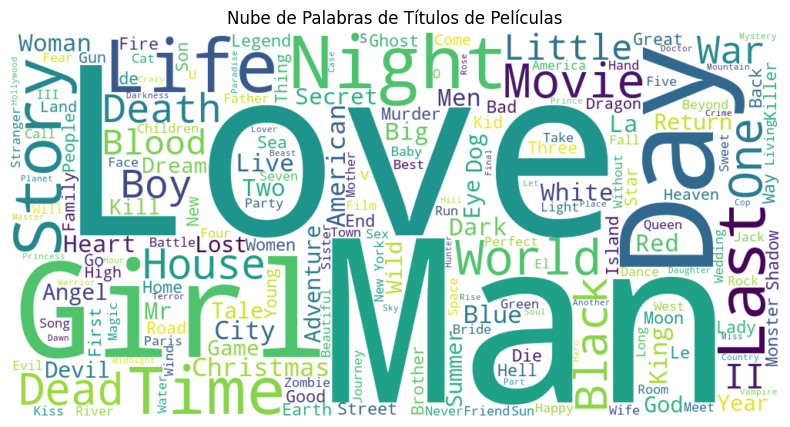

In [17]:
#Creo una nube de palabras con los títulos de las películas
all_titles = ' '.join(df_eda['title'].dropna().values)
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(all_titles)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Títulos de Películas')
plt.show()

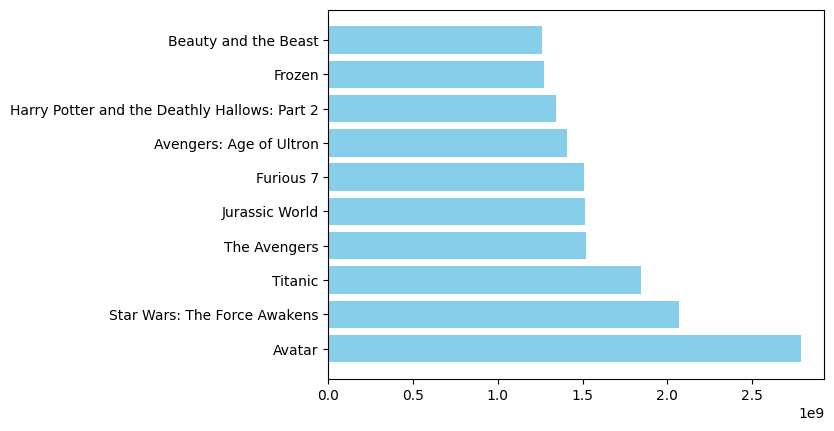

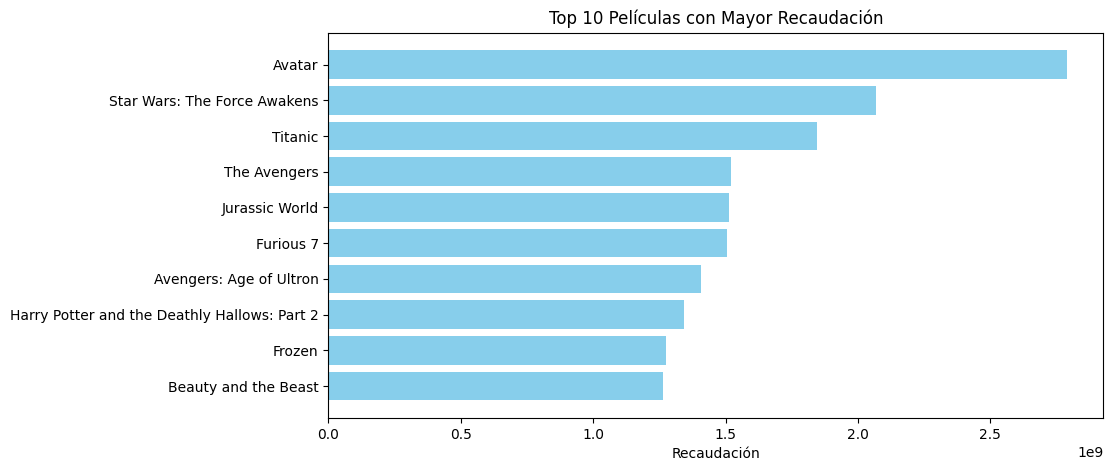

In [18]:
# Gráfico de barras del top 10, películas con mayor recaudación.
top_10_revenue = df_eda.nlargest(10, 'revenue')
# Crear barras horizontales
bars = plt.barh(top_10_revenue['title'], top_10_revenue['revenue'], color='skyblue')
plt.figure(figsize=(10, 5))
plt.barh(top_10_revenue['title'], top_10_revenue['revenue'], color='skyblue')
plt.xlabel('Recaudación')
plt.title('Top 10 Películas con Mayor Recaudación')
plt.gca().invert_yaxis()
plt.show()

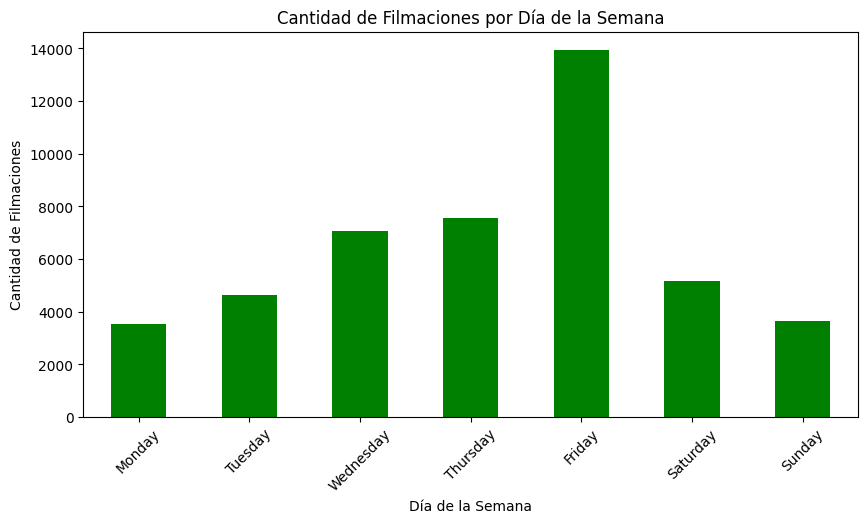

In [26]:
# Gráfico de barras de la cantidad de filmaciones por día de la semana
df_eda['release_day'] = pd.to_datetime(df_eda['release_date'], errors='coerce').dt.day_name()
filmaciones_por_dia = df_eda['release_day'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(10, 5))
filmaciones_por_dia.plot(kind='bar', color='green')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Filmaciones')
plt.title('Cantidad de Filmaciones por Día de la Semana')
plt.xticks(rotation=45)
plt.show()


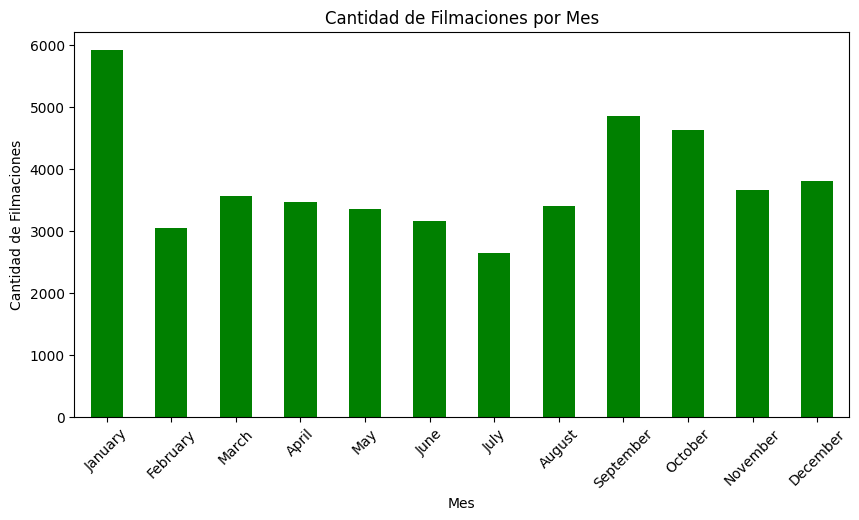

In [28]:
# Gráfico de barras de la cantidad de filmaciones por mes
df_eda['release_month'] = pd.to_datetime(df_eda['release_date'], errors='coerce').dt.month_name()
filmaciones_por_mes = df_eda['release_month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
plt.figure(figsize=(10, 5))
filmaciones_por_mes.plot(kind='bar', color='green')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Filmaciones')
plt.title('Cantidad de Filmaciones por Mes')
plt.xticks(rotation=45)
plt.show()
